1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$ standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$

In [19]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

In [20]:
N=1000
rng=np.random.default_rng(seed=94)
x1=rng.normal(0.,1.,N)
x2=rng.normal(0.,3.,N)
x3=2*x1+x2
data_matrix=np.concatenate((x1[:,None], x2[:,None], x3[:,None]), axis=1)
print(data_matrix, data_matrix.shape)

[[ 1.01235317  5.02769482  7.05240115]
 [ 0.51376341 -4.68758638 -3.66005957]
 [-0.66315524 -5.70196341 -7.02827388]
 ...
 [ 0.25588605 -5.21320992 -4.70143781]
 [-0.14549478 -3.03058167 -3.32157122]
 [-1.48603968 -0.39849989 -3.37057925]] (1000, 3)


* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD (---> on data matrix). Check that the two procedures yield to same result

In [21]:
x1_centered=x1-x1.mean()
x2_centered=x2-x2.mean()
x3_centered=x3-x3.mean()
data_matrix_centered=np.concatenate((x1_centered[:,None], x2_centered[:,None], x3_centered[:,None]), axis=1)
covariance_matrix=(data_matrix_centered.T).dot(data_matrix_centered)/(N-1) # ---> NB the N-1
#print(covariance_matrix)
#element=[element in covariance_matrix if element > 1 else NaN] # ---> fix?
#print(element)

eig_vals, eig_vects= la.eig(covariance_matrix)
print(np.real_if_close(eig_vals), '\n \n', eig_vects, '\n \n')

U, spectrum, Vt = la.svd(data_matrix_centered) 
print(U, '\n \n', spectrum, '\n \n', Vt)
# ---> SVD algo also orders eigvals->eigvects from largest to smallest

print(np.allclose(np.sort(eig_vals)[::-1], spectrum**2/(N-1))) # ---> also try it for matrix? (as an exercise)
# ---> NB the **2 / N-1

[ 1.95529015e+01 -1.09938550e-15  2.56168182e+00] 
 
 [[-0.07298054  0.81649658 -0.57271911]
 [-0.62845425  0.40824829  0.66210164]
 [-0.77441532 -0.40824829 -0.48333657]] 
 

[[-6.13992031e-02  1.20461555e-02  1.50776555e-01 ... -3.02907328e-03
   1.14060523e-02  4.95065803e-02]
 [ 4.19043845e-02  3.12054939e-02  8.16672008e-01 ... -5.33709789e-02
  -8.94041846e-03 -4.72117932e-03]
 [ 6.57433700e-02 -1.02373838e-03 -1.85562787e-02 ... -6.33623970e-03
  -2.91689000e-02  1.17644582e-03]
 ...
 [ 5.01728098e-02  2.52156784e-02  4.11687076e-02 ...  9.97122872e-01
  -4.96630608e-04  5.82371808e-05]
 [ 3.29221762e-02  5.28871397e-03 -4.07037713e-03 ... -1.72109128e-03
   9.98893453e-01 -3.85177539e-04]
 [ 2.20582835e-02 -4.48054071e-02 -2.07546106e-03 ... -1.56405610e-05
  -5.08029045e-04  9.97596977e-01]] 
 
 [1.39761757e+02 5.05877469e+01 9.59973534e-15] 
 
 [[-0.07298054 -0.62845425 -0.77441532]
 [ 0.57271911 -0.66210164  0.48333657]
 [ 0.81649658  0.40824829 -0.40824829]]
True


* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordinates as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) projections.

(1+0j)
(0.8841632336901849+0j)
[[-0.07298054 -0.57271911]
 [-0.62845425  0.66210164]
 [-0.77441532 -0.48333657]]


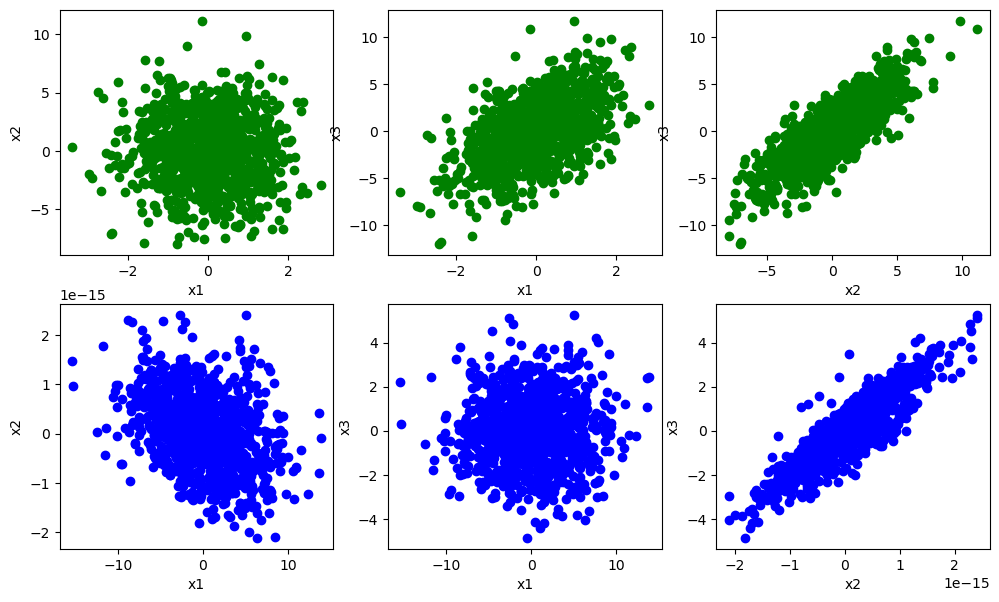

In [22]:
#---> For "variabilty" they mean the sum (trace) of the new eigenvalues normalised by the sum of the original ones
initial_trace=covariance_matrix.trace()
# ---> let's try to discard one dimension:
n_rv=data_matrix.shape[1]
new_spectrum=(np.sort(eig_vals)[::-1])[:(n_rv-1)]
#print(new_spectrum)
# ---> then two:
new_variability=np.sum(new_spectrum)/initial_trace
print(new_variability) # ---> how to approx correctly?
new_new_spectrum=(np.sort(eig_vals)[::-1])[:(n_rv-2)]
new_new_variability=np.sum(new_new_spectrum)/initial_trace
print(new_new_variability)
# ---> keep 2 dimensions (as expected)

new_eig_vects=eig_vects[:,[0,2]] 
reduced_data_matrix_centered=np.dot(data_matrix_centered, new_eig_vects) # ---> NB eig vects are on columns!
print(new_eig_vects)
# --->  data_matrix_centered everywhere in this cell

data_matrix_centered_new_base=np.dot(data_matrix_centered, eig_vects)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,7)) # ---> NB the syntax
acc=0
for i in range(2):
    for j in range(i+1,3):
        #print("j:",j)
        axes[0,acc].scatter(data_matrix_centered[:,i], data_matrix_centered[:,j], color='g')
        axes[0,acc].set_xlabel(f"x{i+1}")
        axes[0,acc].set_ylabel(f"x{j+1}")
        axes[1,acc].scatter(data_matrix_centered_new_base[:,i], data_matrix_centered_new_base[:,j], color='b')
        axes[1,acc].set_xlabel(f"x{i+1}")
        axes[1,acc].set_ylabel(f"x{j+1}")
        #print("acc:",acc)
        acc=acc+1
# ---> TODO: add legend. ax titles, fig title?

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standard deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [27]:
# everything the same, 10 new columns
n=10
epsilon=0.1
noise_matrix=rng.normal(0.,0.1,(N,n)) # ---> NB this is the meaning og "random noise" here
noise_matrix_centered=noise_matrix-noise_matrix.mean(axis=0)
data_matrix_centered=np.concatenate((x1_centered[:,None], x2_centered[:,None],
                                     x3_centered[:,None], noise_matrix_centered), axis=1)
n_rv=data_matrix_centered.shape[1]
_, spectrum, Vt = la.svd(data_matrix_centered)
sorted_eig_vals=spectrum**2/(N-1)
sorted_eig_vects=Vt # ---> the rows this time, NOT the columns
initial_trace=np.sum(sorted_eig_vals)
print(initial_trace)
# ---> let's try to discard one dimension at a time:
i_max=-1
new_variability=1
new_eig_vects=sorted_eig_vects
for i in range(1,n_rv):
    new_spectrum=sorted_eig_vals[:(n_rv-i)]
    previous_variability=new_variability # ---> of previous cycle
    new_variability=np.sum(new_spectrum)/initial_trace
    print(i,new_variability)
    if (new_variability<0.99):
        i_max=i-1 # ---> of previous cycle
        new_variability=previous_variability
        new_eig_vects=sorted_eig_vects[:(n_rv-i_max),:]
        # ---> eg if all to keep: n_rv-(1-1)= n_rv therefore original vector
        break
# --> check this?
print(i_max,'\n \n', new_variability,'\n \n', new_eig_vects)
data_matrix_centered_new_base=np.dot(data_matrix_centered, sorted_eig_vects.T)

22.216168872728435
1 1.0
2 0.9996107279494626
3 0.9992044858313276
4 0.9987851995160634
5 0.9983558302036304
6 0.9979052989249911
7 0.9974374174529003
8 0.9969526424039741
9 0.9964589831760946
10 0.9959558412182581
11 0.9954335642032376
12 0.8801222712009684
11 
 
 0.9954335642032376 
 
 [[-7.29803269e-02 -6.28453701e-01 -7.74414354e-01 -9.04288095e-05
  -9.37807946e-04 -1.75200041e-04  3.31894667e-04  5.90102484e-04
   3.83509445e-04  4.93820769e-04  1.23669164e-04 -6.13573093e-04
  -2.57575694e-04]
 [ 5.72708755e-01 -6.62088457e-01  4.83329052e-01  8.33400186e-04
  -2.88274160e-03 -2.22501668e-03  3.54510564e-03 -1.34870140e-03
   8.37738825e-04 -1.44771040e-03 -3.67474568e-05  2.29844941e-03
   4.00928807e-04]]


IndexError: index 17 is out of bounds for axis 1 with size 17

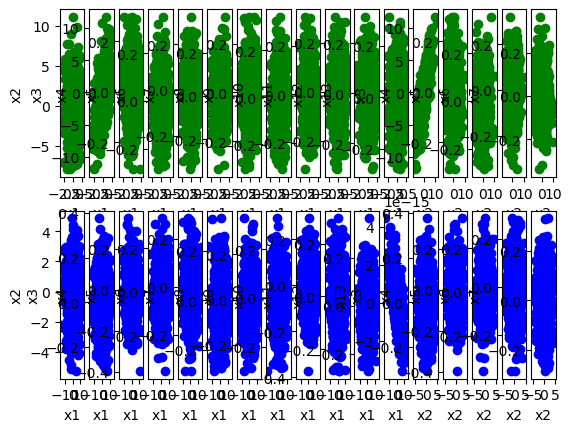

In [26]:
#fig, axes = plt.subplots(nrows=2, ncols=17)
#acc=0
#for i in range(2):
#    for j in range(i+1,13):
#        axes[0,acc].scatter(data_matrix_centered[:,i], data_matrix_centered[:,j], color='g')
#        axes[0,acc].set_xlabel(f"x{i+1}")
#        axes[0,acc].set_ylabel(f"x{j+1}")
#        axes[1,acc].scatter(data_matrix_centered_new_base[:,i], data_matrix_centered_new_base[:,j], color='b')
#        axes[1,acc].set_xlabel(f"x{i+1}")
#        axes[1,acc].set_ylabel(f"x{j+1}")
#        acc=acc+1

# ---> TODO: draw some USEFUL graph?

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [ ]:
# y = 0, x = A cos(omega * t)
# unclear what this "rotation" should be?

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 